Loan Predication Data Analysis

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
import io
%cd "C:\Users\rakes\OneDrive\Desktop\D\dataset"

C:\Users\rakes\OneDrive\Desktop\D\dataset


In [68]:
loan_df=pd.read_csv("Loan prediction dataset.csv")

In [69]:
print(loan_df.shape)

(614, 13)


Data Preparation and Cleaning

In [70]:
loan_df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [71]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [73]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
pd.set_option("display.max_rows",14)
loan_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
# split data into objectcols & numericols
objectcols=loan_df.select_dtypes(include=["object"])
numericcols=loan_df.select_dtypes(include=np.number)

In [76]:
print(objectcols.shape)
print(numericcols.shape)

(614, 8)
(614, 5)


In [77]:
loan_df['Loan_Status'].replace('N',0,inplace=True)
loan_df['Loan_Status'].replace('Y',1,inplace=True)

In [78]:
loan_df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [79]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [80]:
loan_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


Now let’s have a look if the data has missing values or not:

In [81]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has missing values in some of the categorical columns and some 
numerical columns. 

Now Let’s fill the missing values:

The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data.

The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data.

In [82]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0],inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0],inplace= True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0],inplace= True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0],inplace= True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0],inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0],inplace=True)
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(),inplace=True)

In [83]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [84]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Convert categorical columns to numerical values

In [85]:
loan_df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},
                 'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},
                 'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [86]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


Exploratory Data Analysis and Visualization

In [87]:
import plotly.express as px

loan_status_count = loan_df['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count, 
                         names=loan_status_count.index, 
                         title='Loan Approval Status')
fig_loan_status.show()

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

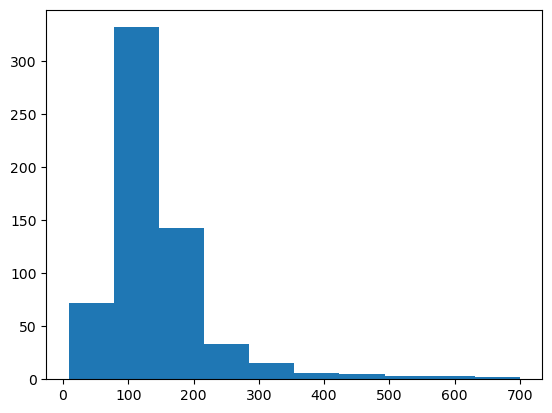

In [88]:
plt.hist(loan_df.LoanAmount)

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

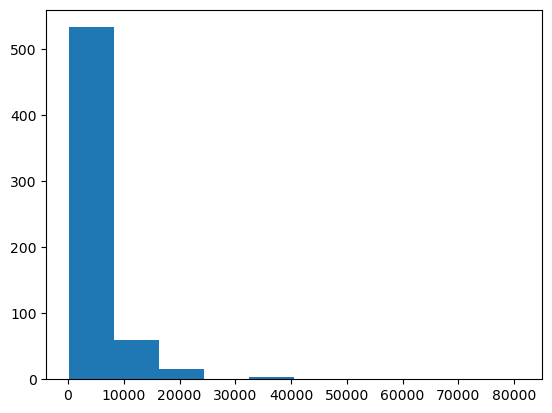

In [89]:
plt.hist(loan_df.ApplicantIncome)

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Education'>

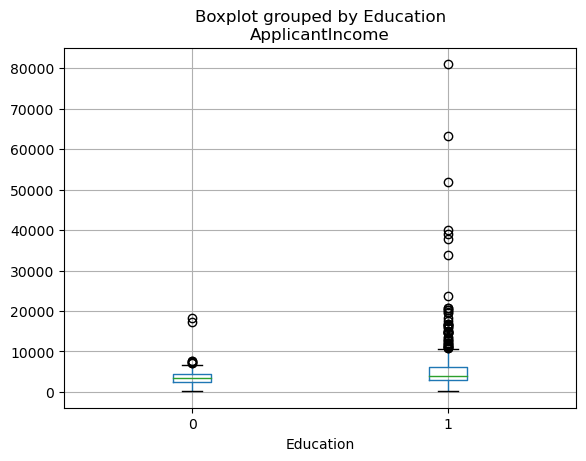

In [90]:
loan_df.boxplot(column='ApplicantIncome', by = 'Education')

In [91]:
import seaborn as sns

<AxesSubplot: xlabel='Education', ylabel='count'>

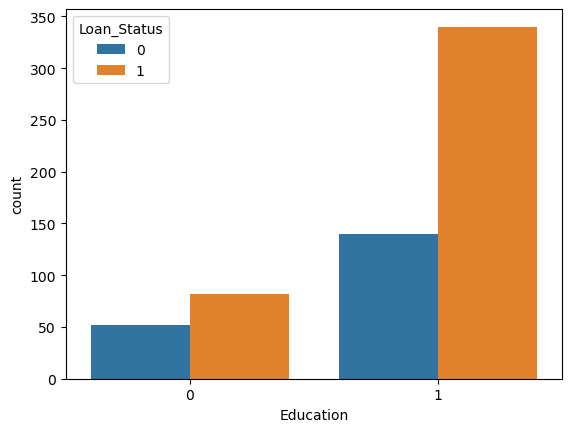

In [92]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_df)

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

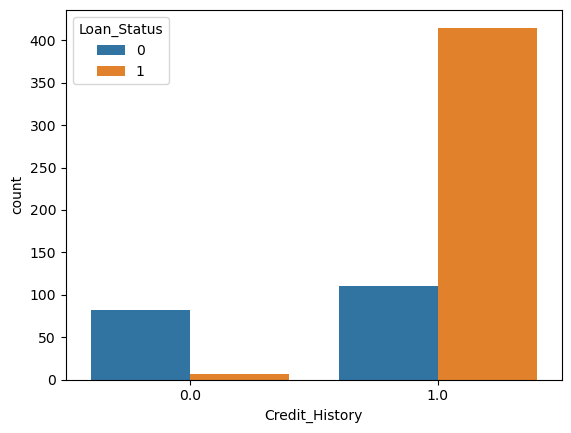

In [93]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_df)

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

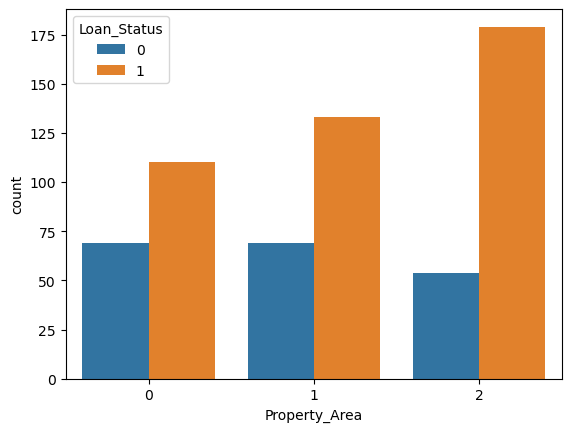

In [94]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_df)

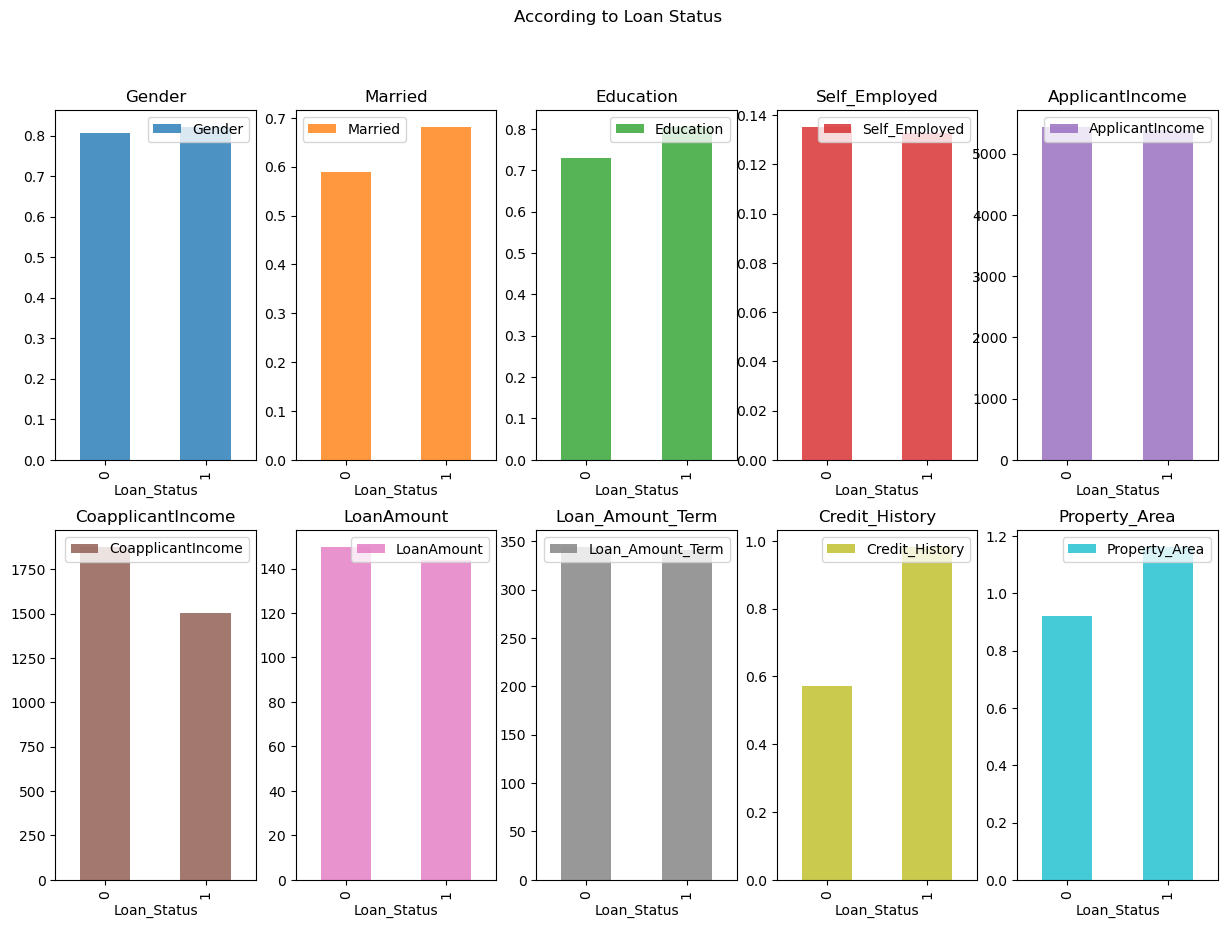

In [95]:
f=loan_df.groupby("Loan_Status").mean().plot(kind="bar",subplots=True,sharex=False,
     sharey=False,figsize=(15,10),layout=(2,5),alpha=0.8,
     title="According to Loan Status")

plt.show()

<AxesSubplot: >

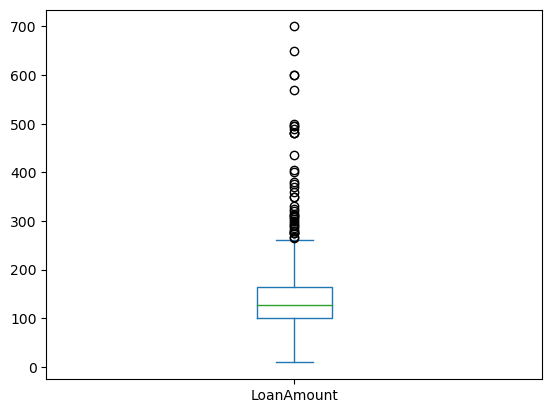

In [96]:
loan_df.LoanAmount.plot(kind='box')

Relationship between the income of the loan applicant and the loan status:

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Loan_Status'>

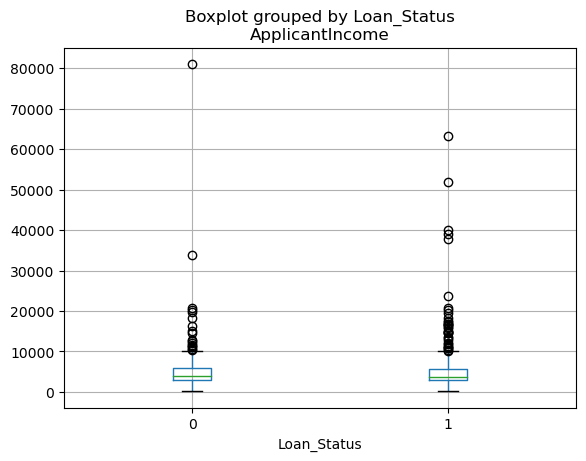

In [97]:
loan_df.boxplot(column='ApplicantIncome', by = 'Loan_Status')

The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:

In [98]:
# Calculate the IQR
Q1 = loan_df['ApplicantIncome'].quantile(0.25)
Q3 = loan_df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
loan_df = loan_df[(loan_df['ApplicantIncome'] >= lower_bound) & 
        (loan_df['ApplicantIncome'] <= upper_bound)]

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Loan_Status'>

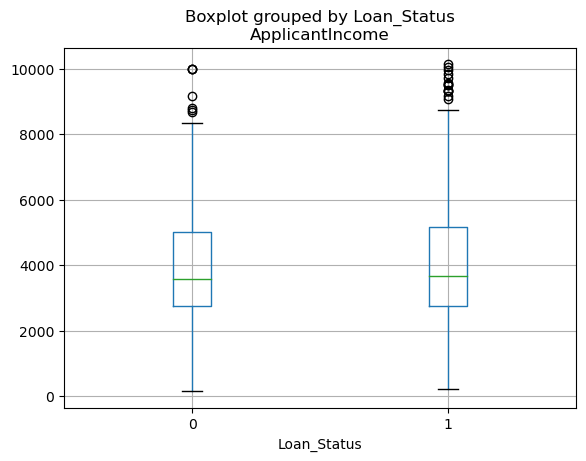

In [99]:
loan_df.boxplot(column='ApplicantIncome', by = 'Loan_Status')

<AxesSubplot: title={'center': 'CoapplicantIncome'}, xlabel='Loan_Status'>

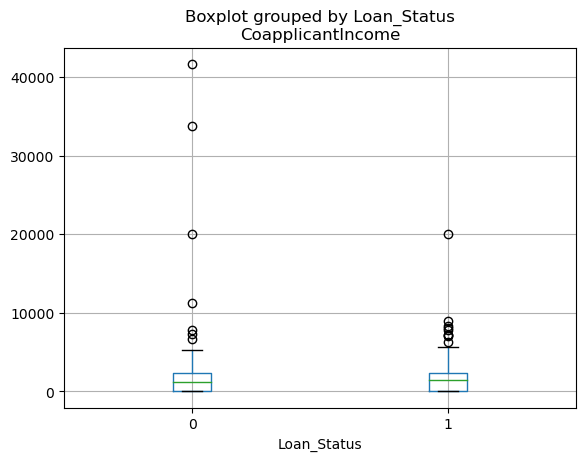

In [100]:
loan_df.boxplot(column='CoapplicantIncome', by = 'Loan_Status')

The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:

In [101]:
# Calculate the IQR
Q1 = loan_df['CoapplicantIncome'].quantile(0.25)
Q3 = loan_df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
loan_df = loan_df[(loan_df['CoapplicantIncome'] >= lower_bound) & 
        (loan_df['CoapplicantIncome'] <= upper_bound)]

<AxesSubplot: title={'center': 'CoapplicantIncome'}, xlabel='Loan_Status'>

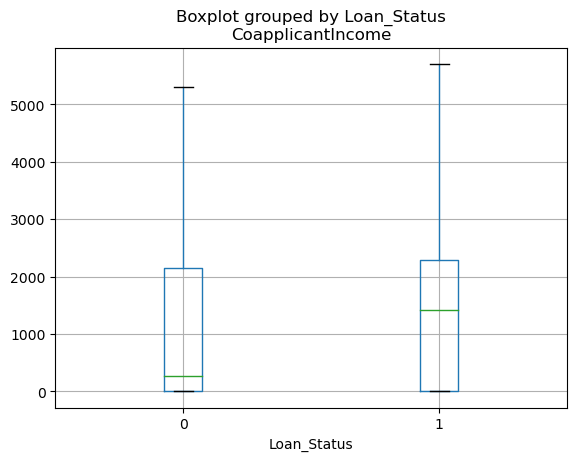

In [102]:
loan_df.boxplot(column='CoapplicantIncome', by = 'Loan_Status')

split the data into training and test sets

In [103]:
X=loan_df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_df['Loan_Status']

In [104]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1         3+          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2,stratify=Y)

In [107]:
print(X.shape,X_test.shape,Y.shape,X_test.shape)

(548, 11) (55, 11) (548,) (55, 11)


In [108]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            548 non-null    object 
 1   Gender             548 non-null    int64  
 2   Married            548 non-null    int64  
 3   Dependents         548 non-null    object 
 4   Education          548 non-null    int64  
 5   Self_Employed      548 non-null    int64  
 6   ApplicantIncome    548 non-null    int64  
 7   CoapplicantIncome  548 non-null    float64
 8   LoanAmount         548 non-null    float64
 9   Loan_Amount_Term   548 non-null    float64
 10  Credit_History     548 non-null    float64
 11  Property_Area      548 non-null    int64  
 12  Loan_Status        548 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 59.9+ KB


In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [110]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Loan_Amount_Term' column (change this to your specific non-numeric column)
X_train['Loan_Amount_Term'] = label_encoder.fit_transform(X_train['Loan_Amount_Term'])
X_test['Loan_Amount_Term'] = label_encoder.transform(X_test['Loan_Amount_Term'])


In [111]:
#Dependent column values
loan_df['Dependents'].value_counts()

0     328
2      91
1      87
3+     42
Name: Dependents, dtype: int64

In [112]:
loan_df=loan_df.replace(to_replace='3+',value=4)

In [113]:
loan_df['Dependents'].value_counts()

0    328
2     91
1     87
4     42
Name: Dependents, dtype: int64

In [114]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1         3+          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [120]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the '3+' column in X_test (change this to your specific non-numeric column)
X_train['Dependents'] = label_encoder.fit_transform(X_train['Dependents'])


In [121]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the '3+' column in X_test (change this to your specific non-numeric column)
X_test['Dependents'] = label_encoder.fit_transform(X_test['Dependents'])


In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

In [123]:
classifier = svm.SVC(kernel='linear')

In [124]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [125]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score (X_train_prediction,Y_train)

In [126]:
print('Accuracy score on training data : ',training_data_accuracy)

Accuracy score on training data :  0.821501014198783


In [127]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score (X_test_prediction,Y_test)

In [128]:
print('Accuracy score on test data:',test_data_accuracy)

Accuracy score on test data: 0.8


In [129]:
# Parameter grid for Logistic Regression
logistic_regression_param_grid = {
    'C': [0.1, 1, 10, 100],  # Adjust the values as needed
    'solver': ['liblinear', 'lbfgs'],
}

# Parameter grid for Decision Tree Classifier
decision_tree_param_grid = {
    'max_depth': [None, 10, 20, 30],  # Adjust the values as needed
    'min_samples_split': [2, 5, 10],
}

# Parameter grid for Random Forest Classifier
random_forest_param_grid = {
    'n_estimators': [100, 200, 300],  # Adjust the values as needed
    'max_depth': [None, 10, 20, 30],
}


In [130]:
# Create GridSearchCV instances for each classifier
logistic_regression_grid = GridSearchCV(LogisticRegression(), logistic_regression_param_grid, cv=5)
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5)
random_forest_grid = GridSearchCV(RandomForestClassifier(), random_forest_param_grid, cv=5)


In [131]:

# Fit the grid search on your data
logistic_regression_grid.fit(X_train, Y_train)
decision_tree_grid.fit(X_train, Y_train)
random_forest_grid.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [132]:


# Access the best parameters and best score
best_logistic_regression_params = logistic_regression_grid.best_params_
best_decision_tree_params = decision_tree_grid.best_params_
best_random_forest_params = random_forest_grid.best_params_
best_logistic_regression_score = logistic_regression_grid.best_score_
best_decision_tree_score = decision_tree_grid.best_score_
best_random_forest_score = random_forest_grid.best_score_


In [133]:
print(best_logistic_regression_params)
print(best_decision_tree_params)
print(best_random_forest_params)
print(best_logistic_regression_score)
print(best_decision_tree_score)
print(best_random_forest_score)

{'C': 0.1, 'solver': 'liblinear'}
{'max_depth': 10, 'min_samples_split': 5}
{'max_depth': 10, 'n_estimators': 200}
0.8194599051741909
0.750587507730365
0.8133992991135848


In [134]:
print("Best parameters for Logistic Regression:", logistic_regression_grid.best_params_)
print("Best parameters for Decision Tree:", decision_tree_grid.best_params_)
print("Best parameters for Random Forest:", random_forest_grid.best_params_)

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}


In [135]:
print("Best score for Logistic Regression:", logistic_regression_grid.best_score_)
print("Best score for Decision Tree:", decision_tree_grid.best_score_)
print("Best score for Random Forest:", random_forest_grid.best_score_)


Best score for Logistic Regression: 0.8194599051741909
Best score for Decision Tree: 0.750587507730365
Best score for Random Forest: 0.8133992991135848


The Best score for Logistic Regression: 0.8194599051741909

Loan approval prediction involves the analysis of various factors, such as the applicant’s financial history, income, credit rating, employment status, and other relevant attributes. By leveraging historical loan data and applying machine learning algorithms, businesses can build models to determine loan approvals for new applicants.